In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def plot2D(x, y, p, n=0, save_flag=0, yz_flag=0):
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')

    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p, rstride=1, cstride=1, cmap=cm.viridis,
                           linewidth=0, antialiased=False)

    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.set_zlim(-0.08, 0.08)

    if yz_flag:
        ax.view_init(elev=0, azim=0)  # yz-plane view
    else:
        ax.view_init(elev=30, azim=225)  # default view

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    if save_flag:
        
        plt.savefig(f'images/image_{n:04d}.jpg')
        plt.close()
    else:
        plt.show()


In [3]:
nx = 100
ny = 100
dx = 2/(nx-1)
dy = 2/(ny-1)

x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

#Initial Conditions
p = np.zeros([nx,ny])
b = np.zeros([nx,ny])
b[nx//4, ny//4] = 100
b[3*nx//4, 3*ny//4] = -100

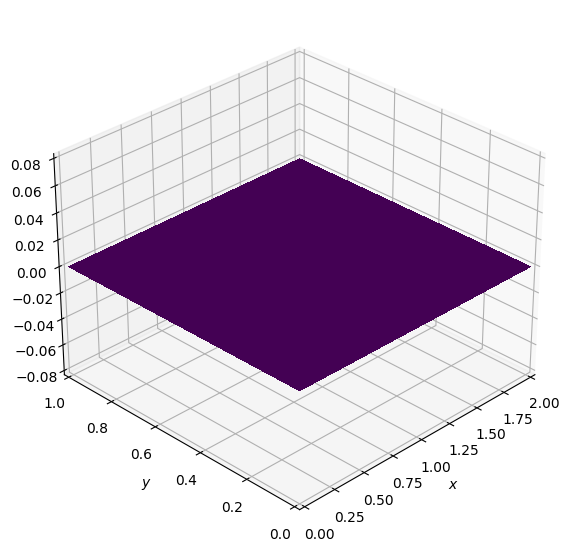

In [5]:
plot2D(x,y,p)

In [6]:
dy2 = dy*dy
dx2 = dx*dx
dx2_dy2 = dx2*dy2
residue = 1
counter = 1
nt = 1000
save_flag = 1
for n in range(nt):
    pn = p.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            p[i,j] = (dy2*(pn[i+1,j] + pn[i-1,j]) + dx2*(pn[i, j+1] + pn[i, j-1]) - dx2_dy2 * b[i,j]) / (2*(dx2 + dy2))
    p[0, :] = 0
    p[ny-1, :] = 0
    p[:, 0] = 0
    p[:, nx-1] = 0

    residue = np.abs((np.sum(np.abs(p[:])) - np.sum(np.abs(pn[:]))) / (np.sum(np.abs(p[:]))))

    plot2D(x, y, p, n = n, save_flag = 1, yz_flag = 1)

#     print("Reisdue = ", residue, "counter = ", counter)
#     counter+=1

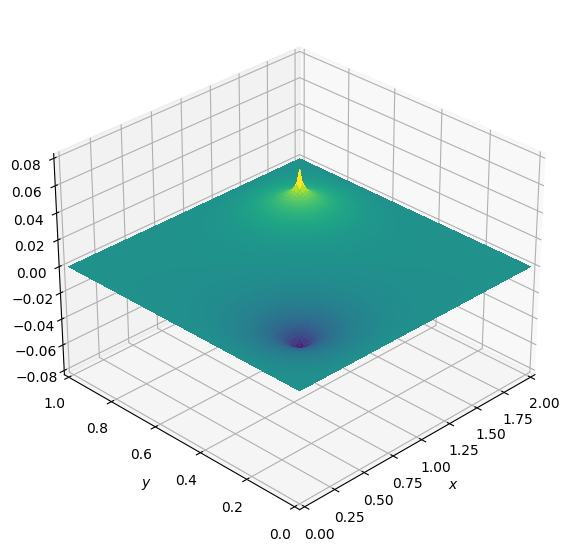

In [7]:
plot2D(x,y,p)